
# Przygotowanie

Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](svc.png)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](svc2.jpg)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0 

Wczytanie danych ze zbioru oraz wizualizacja.

In [396]:
import pandas as pd

data_input = pd.read_csv('./datasets/Ankieta.csv')
data_input.head()

,Waga,Wzrost,Plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


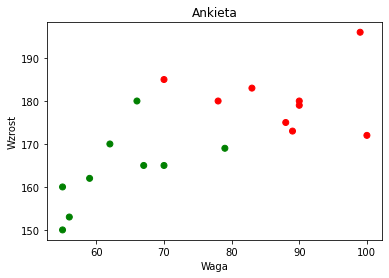

In [397]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = data_input['Waga']
z = data_input['Wzrost']

data_input['Plec'] = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

<ipython-input-398-09f62b60a45a>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_input.hist(ax=ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaa3fb57c0>,
      dtype=object)

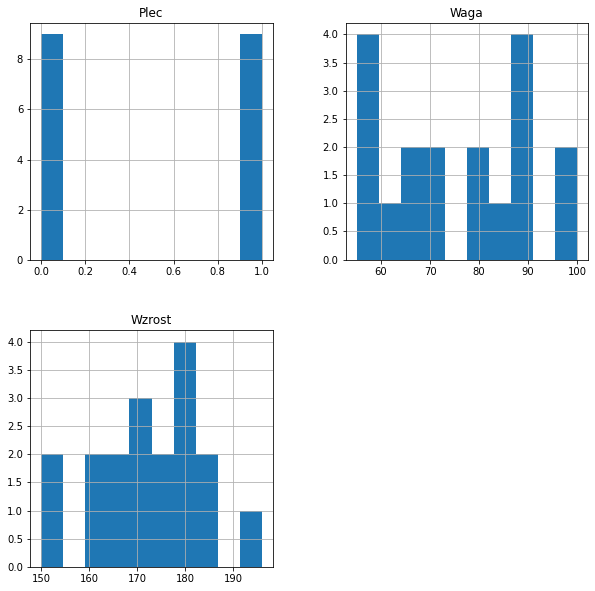

In [398]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_input.hist(ax=ax)

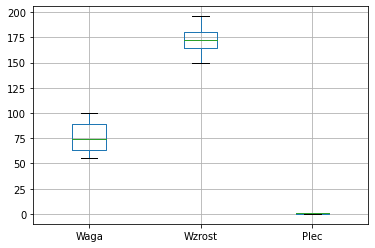

In [399]:
data_input.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane?

In [400]:
def standarize(X):
    mean = X.mean(axis = 0) 
    std = X.std(axis = 0) 
    i = 0

    for col in X.columns.tolist():
        if i == (len(X.columns.tolist()) - 1):
            break
        if std[col] != 0: 
            X[col] -= mean[i]
            X[col] /= std[i]
        else:
            X[col] = 0
        i += 1
            
    return X

In [401]:
scaled_data = data_input.copy()
scaled_data = standarize(scaled_data)

In [402]:
scaled_data.head()

,Waga,Wzrost,Plec
0,-1.345220,-1.032652,1
1,0.176422,0.680503,0
2,-1.345220,-1.889229,1
3,1.565748,2.051027,0
4,0.970323,0.680503,0


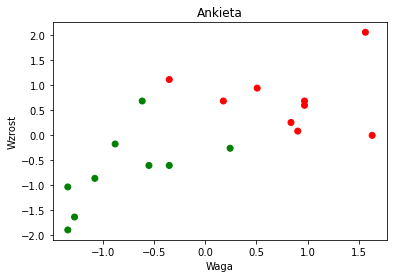

In [403]:
x = scaled_data['Plec']
y = scaled_data['Waga']
z = scaled_data['Wzrost']

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

<ipython-input-404-a8bdc5c286c5>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scaled_data.hist(ax=ax)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaa2997bb0>,
      dtype=object)

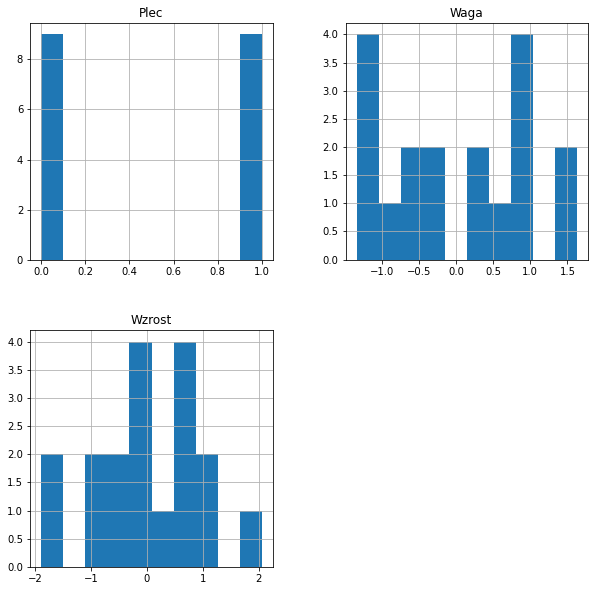

In [404]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
scaled_data.hist(ax=ax)

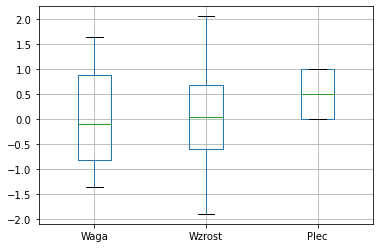

In [405]:
scaled_data.boxplot()

Wizualizacja danych ustandaryzowanych oraz wykres box-plot pokazują, że po zastosowaniu metody wstępnego przetwarzania dane sprowadzone zostały do wartości z zakresu od -2 do 2. Standaryzacja zapewniła więc rozwiązanie problemu różniących się zakresów. Rozkład klas w zbiorze nie uległ zmianom tak jak wszystkie zaprezentowane histogramy. 

## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym.

In [406]:
X = data_input.iloc[:,:-1]
y = data_input.iloc[:,-1].tolist()

scaled_X = scaled_data.iloc[:,:-1]
scaled_y = scaled_data.iloc[:,-1].tolist()

In [407]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_X, 
                                                                                scaled_y, 
                                                                                test_size=0.2, 
                                                                                random_state=42)

## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [408]:
def calculate_accuracy(Y_pred, Y):
    acc = 0
    for i in range(len(Y_pred)):
        if Y_pred[i] == Y[i]:
            acc += 1

    return round((acc * 100)/len(Y_pred), 2)

In [409]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = calculate_accuracy(y_pred, y_test)
acc

50.0

In [410]:
clf = SVC(kernel='linear')
clf.fit(scaled_X_train, scaled_y_train)
scaled_y_pred = clf.predict(scaled_X_test)

scaled_acc = calculate_accuracy(scaled_y_pred, scaled_y_test)
scaled_acc

75.0

## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu -1, 1 z krokiem co 0.1). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

In [411]:
params = []
acc = []
c = 0

while c < 0.9:
    c += 0.1
    clf = SVC(C = c, kernel = 'linear')
    clf.fit(scaled_X_train, scaled_y_train)
    scaled_y_pred = clf.predict(scaled_X_test)
    params.append([clf.coef_[0], clf.intercept_[0], clf.support_vectors_[:,0], clf.support_vectors_[:,1]])
    print('C = ' + str(round(c, 1)) + ' -> ' + str(calculate_accuracy(scaled_y_pred, scaled_y_test)) + '%')

C = 0.1 -> 100.0%
C = 0.2 -> 100.0%
C = 0.3 -> 75.0%
C = 0.4 -> 100.0%
C = 0.5 -> 75.0%
C = 0.6 -> 75.0%
C = 0.7 -> 75.0%
C = 0.8 -> 75.0%
C = 0.9 -> 75.0%
C = 1.0 -> 75.0%


Niestety wartość parametru C musi być większa od 0 (inaczej otrzymujemy błąd), dlatego zakres wartości parametru C przyjmujemy od 0 do 1. W tym przypadku okazuje się, że można stwierdzić, że dla mniejszych wartości parametru C otrzymujemy wyższą wartość dokładności klasyfikatora.

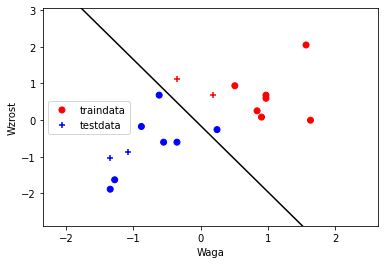

In [412]:
import matplotlib.animation as animation
from IPython.display import HTML

def animate(i):
    w = params[0][0]
    yy = - (w[0] * xx + params[i][1]) / w[1] 
    line.set_xdata(xx)
    line.set_ydata(yy)
    return line

x_min, x_max = scaled_X_train.iloc[:, 0].min() - 1, scaled_X_train.iloc[:, 0].max() + 1
y_min, y_max = scaled_X_train.iloc[:, 1].min() - 1, scaled_X_train.iloc[:, 1].max() + 1

w = params[0][0]
xx = np.linspace(x_min, x_max) 
yy = - (w[0] * xx + params[0][1]) / w[1] 

fig = plt.figure()
plt.xlabel('Waga')
plt.ylabel('Wzrost')

plt.axis([x_min, x_max, y_min, y_max])
line, = plt.plot(xx, yy, 'k-')

plt.scatter(scaled_X_train.iloc[:,0], scaled_X_train.iloc[:,1], zorder = 3, marker='o', c = colormap[scaled_y_train], label = 'traindata')
plt.scatter(scaled_X_test.iloc[:,0], scaled_X_test.iloc[:,1], zorder = 3, marker = '+', c = colormap[scaled_y_test], label = 'testdata')

plt.legend()
ani = animation.FuncAnimation(fig, animate, frames=len(params), interval=500)
HTML(ani.to_jshtml())

### Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

## Zadanie 5

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

In [425]:
data_input = pd.read_csv('./datasets/Breast.csv')
data_input.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


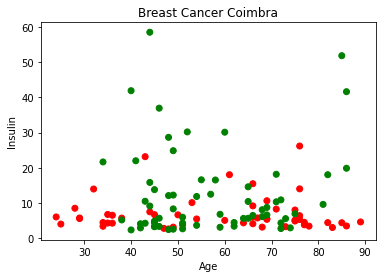

In [426]:
x = data_input['Classification']
y = data_input['Age']
z = data_input['Insulin']

plt.scatter(y, z, c = x, cmap = colors.ListedColormap(['red', 'green']))
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.title('Breast Cancer Coimbra')
plt.show()

In [427]:
data = data_input[['Age', 'Insulin','Classification']]

## Zadanie 6

Proszę dokonać standaryzacji danych

In [428]:
scaled_data = data.copy()
scaled_data = standarize(scaled_data)
scaled_data.head()

,Age,Insulin,Classification
0,-0.577289,-0.725591,1
1,1.594902,-0.685066,1
2,1.532839,-0.547697,1
3,0.663963,-0.674041,1
4,1.781089,-0.641958,1


## Zadanie 7

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

In [429]:
scaled_X = scaled_data.iloc[:,:-1]
scaled_y = scaled_data.iloc[:,-1].tolist()

scaled_X_train, scaled_X_test, scaled_y_train, scaled_y_test = train_test_split(scaled_X, 
                                                                                scaled_y, 
                                                                                test_size=0.2, 
                                                                                random_state=42)

In [430]:
def test_kernels(X_train, y_train, X_test, y_test, c, g, kernels):
    item = {}
    
    for k in kernels:
        clf = SVC(C = c, kernel = k, gamma = g)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        item[k] = str(calculate_accuracy(y_pred, y_test)) + '%'
        
    return item

In [431]:
def test_gamma(X_train, y_train, X_test, y_test, g, kernels):
    data = []
    c_list = []
    c = 0
    
    while c < 0.9:
        c += 0.1
        c_list.append(round(c, 1))
        item = test_kernels(X_train, y_train, X_test, y_test, c, g, kernels)
        data.append(item)
        
    return pd.DataFrame(data = data, index = list(c_list), columns = list(kernels)) 

In [432]:
kernels = {'linear', 'poly', 'rbf', 'sigmoid'}
gammas = ['scale', 'auto']

scale_result = test_gamma(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, gammas[0], kernels)
auto_result = test_gamma(scaled_X_train, scaled_y_train, scaled_X_test, scaled_y_test, gammas[1], kernels)

__Zestawienie wartości dokładności klasyfikatorów w zależności od parametru *C* oraz parametru *kernel* dla *gamma* typu *scale*__

In [433]:
scale_result

,poly,sigmoid,linear,rbf
0.1,54.17%,50.0%,50.0%,50.0%
0.2,66.67%,50.0%,50.0%,58.33%
0.3,66.67%,50.0%,50.0%,66.67%
0.4,66.67%,50.0%,50.0%,70.83%
0.5,66.67%,62.5%,50.0%,70.83%
0.6,66.67%,54.17%,50.0%,70.83%
0.7,66.67%,70.83%,50.0%,70.83%
0.8,66.67%,62.5%,50.0%,70.83%
0.9,66.67%,62.5%,50.0%,70.83%
1.0,66.67%,62.5%,50.0%,70.83%


__Zestawienie wartości dokładności klasyfikatorów w zależności od parametru *C* oraz parametru *kernel* dla *gamma* typu *auto*__

In [434]:
auto_result

,poly,sigmoid,linear,rbf
0.1,54.17%,50.0%,50.0%,50.0%
0.2,70.83%,50.0%,50.0%,62.5%
0.3,66.67%,50.0%,50.0%,70.83%
0.4,66.67%,54.17%,50.0%,70.83%
0.5,66.67%,50.0%,50.0%,70.83%
0.6,66.67%,66.67%,50.0%,70.83%
0.7,66.67%,66.67%,50.0%,70.83%
0.8,66.67%,62.5%,50.0%,70.83%
0.9,66.67%,62.5%,50.0%,70.83%
1.0,66.67%,66.67%,50.0%,66.67%


## Zadanie 8

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

Poniżej przedstawiona jest macierz pomyłek jednego z najlepszych klasyfikatów o najwyższej dokładności uzyskanego w ramach poprzedniego zadania. Ponieważ tak samo wysoką dokładnością charakteruje się wiele klasyfikatorów, przyjmiemy, że macierz pomyłek zostanie stworzona dla SVC o parametrach *C* = 0.5, *kernel* = *rbf*  oraz *gamma* = *scale*

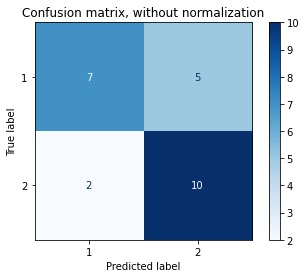

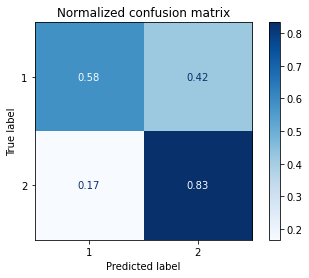

In [435]:
from sklearn.metrics import plot_confusion_matrix

classifier = SVC(C = 0.5, kernel = 'rbf', gamma = 'scale')
classifier.fit(scaled_X_train, scaled_y_train) 

np.set_printoptions(precision=2)

titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, scaled_X_test, scaled_y_test,
                                 display_labels = ['1', '2'],
                                 cmap = plt.cm.Blues,
                                 normalize = normalize)
    disp.ax_.set_title(title)

plt.show()